In [1]:
import pandas as pd
Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
data= [[ 1, 0.3, 2.1, 1.3],[ 2.5, 1, 1, 0.77],[ 0.0, 1, 2, 1],[ 0, 3.2, 1, 1.2],[ 10, 1, 1, 1]]
df = pd.DataFrame(data, index=Index, columns=Cols)
df.head()

,A,B,C,D
aaa,1.0,0.3,2.1,1.30
bbb,2.5,1.0,1.0,0.77
ccc,0.0,1.0,2.0,1.00
ddd,0.0,3.2,1.0,1.20
eee,10.0,1.0,1.0,1.00


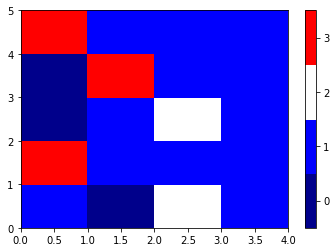

In [5]:
import matplotlib.pyplot as plt
import numpy as np
cmap = colors.ListedColormap(['darkblue','blue','white','pink','red'])
bounds=[-0.5, 0.5, 1.5, 2.5, 3.5]
norm = colors.BoundaryNorm(bounds, cmap.N)
heatmap = plt.pcolor(np.array(data), cmap=cmap, norm=norm)
plt.colorbar(heatmap, ticks=[0, 1, 2, 3])

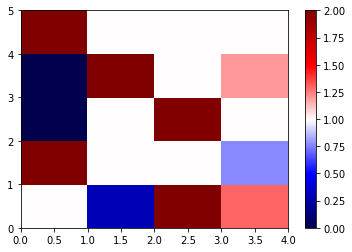

In [6]:
# Builtin colourmap "seismic" has the blue-white-red
#   scale you want
plt.pcolor(np.array(data), cmap=plt.cm.seismic, vmin=0, vmax=2)
plt.colorbar()
plt.show()

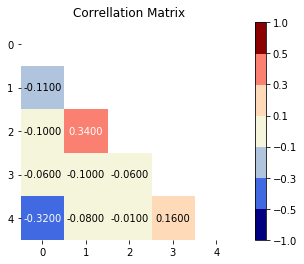

In [10]:
from matplotlib import colors

corr_matrix = np.array([[0,0,0,0,0],
                        [-.11,0,0,0,0],
                        [-.1,.34,0,0,0],
                        [-0.06,-.1,-.06,0,0],
                        [-0.32,-.08,-.01,.16,0]])

cmap = colors.ListedColormap(["navy", "royalblue", "lightsteelblue", 
                              "beige", "peachpuff", "salmon", "darkred"])
bounds = [-1, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix_masked = np.ma.masked_array(corr_matrix, mask)

fig, ax = plt.subplots()

im = ax.imshow(corr_matrix_masked, cmap=cmap, norm=norm)
fig.colorbar(im, ticks=[-1, -0.5, -0.3, -0.1, +0.1, +0.3, +0.5, +1])

for i in range(corr_matrix_masked.shape[0]):
    for j in range(corr_matrix_masked.shape[1]):
        if not corr_matrix_masked.mask[i,j]:
            val = corr_matrix_masked[i,j]
            color = {True:"w", False:"k"}[np.abs(val) > 0.3]
            ax.text(j,i,"{:.4f}".format(corr_matrix_masked[i,j]), 
                    ha="center", va="center", color=color)

ax.set_title('Correllation Matrix')
for k,v in ax.spines.items():
    v.set_visible(False)
plt.show()